In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [109]:
# Load in the dataframe
df = pd.read_csv("winemag-data-130k-v2.csv", index_col=0)
# Looking at first 5 rows of the dataset
df.head()

,description
1,"Aromas include tropical fruit, broom, brimston..."
2,"This is ripe and fruity, a wine that is smooth..."
3,"Tart and snappy, the flavors of lime flesh and..."
4,"Pineapple rind, lemon pith and orange blossom ..."
5,"Much like the regular bottling from 2012, this..."


In [110]:
medicine_mask = np.array(Image.open("bottle-white-vector-medicine.png"))

In [111]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from wordcloud import WordCloud

lemmatized_corpus = []
original_corpus = []      # For storing the non-stemmed tokens


for details in df.description:                # Iterate over the files 

    contents = details.lower() # lowercase contents

    tokens = [w for w in word_tokenize(contents)
         if w.isalnum()]     # Extract tokens
    
    no_stops = [t for t in tokens
           if t not in stopwords.words('english')]
    
    # Instantiate the WordNetLemmatizer
    wordnet_lemmatizer = WordNetLemmatizer()
    
    # Lemmatize all tokens into a new list: lemmatized
    lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

    lemmatized_corpus.append(lemmatized)
    original_corpus.append(tokens)    # Store original document


dictionary = Dictionary(lemmatized_corpus) # Build the dictionary


# Convert to vector corpus

vectors = [dictionary.doc2bow(text) for text in lemmatized_corpus]

(-0.5, 1000.5, 1821.5, -0.5)

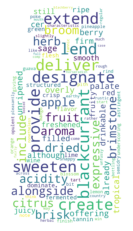

In [112]:
# Initialize the word cloud

wc = WordCloud(
    background_color="white",
    max_words=100,
    width = 1024,
    height = 720,
    mask=medicine_mask,
    stopwords=stopwords.words("english")
)

# Generate the cloud
words_dict = dict(dictionary)
words = " ".join(w for w in words_dict.values())
wc.generate(words)

# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

(-0.5, 1000.5, 1821.5, -0.5)

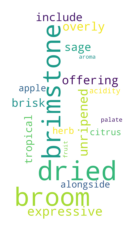

In [113]:
# Build TF-IDF model

tfidf = TfidfModel(vectors)

# Get TF-IDF weights

weights = tfidf[vectors[0]]

# Get terms from the dictionary and pair with weights

weights = [(dictionary[pair[0]], pair[1]) for pair in weights]

# Initialize the word cloud

wc = WordCloud(
    background_color="white",
    max_words=100,
    width = 1024,
    height = 720,
    mask=medicine_mask,
    stopwords=stopwords.words("english")
)

# Generate the cloud
weights_dict = dict(weights)
wc.generate_from_frequencies(weights_dict)

# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")